In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
experts_cnt = 16
factors=24

In [2]:
def middle_name(means: list): # среднее значение по группе эксперотв
    dic_value = {}
    for l in means:
        for i in range(len(l)):
            if l[i] in dic_value:
                dic_value[l[i]] += factors - i
            else:
                dic_value[l[i]] = factors - i
    for item in dic_value.keys():
        dic_value[item] = dic_value[item] / len(means)

    return dic_value


In [3]:
def get_dic_from_list(mean: list):
    ret_dic = {}
    for i in range(len(mean)):
        ret_dic[mean[i]] = factors - i
    return ret_dic



In [4]:
def concordance_k(means: list): # коофицент
    middle_mean = middle_name(means)
    S = 0
    for mean in means:
        dic_mean = get_dic_from_list(mean)
        for key, val in dic_mean.items():
            S += (val - middle_mean[key])**2
    W = (12*S)/(experts_cnt**2 * (factors**3 - factors))
    return W

In [5]:

friendliness_buf = [[23,19,22,17,8,6,13,1,16,9,12,3,2,20,5,21,7,24,15,4,11,18,10,14],
[10,4,13,6,19,3,23,9,8,14,24,18,11,5,1,16,21,15,22,2,12,20,7,17],
[18,11,1,12,10,6,8,14,23,24,7,4,17,3,9,21,15,20,13,5,2,19,16,22],
[20,1,5,9,7,3,17,12,21,23,15,11,24,6,22,10,18,14,16,4,8,19,2,13],
[12,22,18,11,3,16,8,13,1,15,5,10,24,17,20,7,9,23,19,14,4,6,21,2],
[16,5,3,15,10,18,7,4,24,1,21,2,22,20,9,11,12,8,6,23,17,19,13,14],
[6,8,22,11,3,4,19,13,20,15,10,18,12,21,17,9,7,1,23,5,2,16,14,24],
[18,24,7,12,14,20,2,9,19,13,1,22,4,17,15,10,23,8,5,11,3,21,16,6],
[1,18,13,22,20,23,10,19,9,3,8,5,12,15,14,6,4,7,2,21,24,11,16,17],
[5,23,18,1,3,2,4,19,24,12,20,7,21,8,6,22,16,11,13,17,9,10,15,14],
[9,24,20,1,13,5,11,19,16,7,14,17,21,8,4,12,22,15,6,18,2,23,10,3],
[10,21,8,15,11,12,16,4,23,13,6,2,22,19,17,5,18,24,7,3,14,9,20,1],
[8,14,12,22,5,15,11,16,19,10,13,7,17,20,6,2,9,4,24,18,1,23,3,21],
[12,1,9,6,23,24,2,18,16,21,22,17,4,10,11,15,5,14,20,3,8,13,19,7],
[10,14,13,22,6,24,23,20,21,18,1,15,11,5,3,4,19,16,17,7,12,8,2,9],
[17,9,1,18,22,24,8,21,23,14,12,13,11,19,7,4,6,10,3,5,20,16,2,15]];

In [6]:
friendliness = np.array(friendliness_buf)
dest_matr = np.zeros((len(friendliness), len(friendliness)))
friendliness

array([[23, 19, 22, 17,  8,  6, 13,  1, 16,  9, 12,  3,  2, 20,  5, 21,
         7, 24, 15,  4, 11, 18, 10, 14],
       [10,  4, 13,  6, 19,  3, 23,  9,  8, 14, 24, 18, 11,  5,  1, 16,
        21, 15, 22,  2, 12, 20,  7, 17],
       [18, 11,  1, 12, 10,  6,  8, 14, 23, 24,  7,  4, 17,  3,  9, 21,
        15, 20, 13,  5,  2, 19, 16, 22],
       [20,  1,  5,  9,  7,  3, 17, 12, 21, 23, 15, 11, 24,  6, 22, 10,
        18, 14, 16,  4,  8, 19,  2, 13],
       [12, 22, 18, 11,  3, 16,  8, 13,  1, 15,  5, 10, 24, 17, 20,  7,
         9, 23, 19, 14,  4,  6, 21,  2],
       [16,  5,  3, 15, 10, 18,  7,  4, 24,  1, 21,  2, 22, 20,  9, 11,
        12,  8,  6, 23, 17, 19, 13, 14],
       [ 6,  8, 22, 11,  3,  4, 19, 13, 20, 15, 10, 18, 12, 21, 17,  9,
         7,  1, 23,  5,  2, 16, 14, 24],
       [18, 24,  7, 12, 14, 20,  2,  9, 19, 13,  1, 22,  4, 17, 15, 10,
        23,  8,  5, 11,  3, 21, 16,  6],
       [ 1, 18, 13, 22, 20, 23, 10, 19,  9,  3,  8,  5, 12, 15, 14,  6,
         4,  7,  2, 21, 

In [7]:
dest_matr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
for i in range(len(dest_matr)): # разница в мнении экспертов 
    for j in range(len(dest_matr)):
        dest_matr[i][j] = np.sqrt(np.sum((friendliness[i] - friendliness[j])**2))
dest_matr

array([[ 0.        , 45.254834  , 43.01162634, 50.13980455, 48.24935233,
        47.93745926, 46.04345773, 47.87483681, 53.96295025, 47.26520919,
        49.35585072, 43.40506883, 47.03190407, 51.02940329, 49.69909456,
        50.6359556 ],
       [45.254834  ,  0.        , 43.93176527, 38.80721582, 57.5847202 ,
        53.1789432 , 44.11349   , 55.58776844, 59.49789912, 47.4341649 ,
        43.97726685, 54.58937626, 49.4165964 , 43.26661531, 47.39198244,
        51.76871642],
       [43.01162634, 43.93176527,  0.        , 32.64965543, 50.23942675,
        47.60252094, 46.5188134 , 45.45327271, 57.42821606, 40.29888336,
        46.73328578, 43.77213726, 46.19523785, 44.56455991, 46.021734  ,
        46.9893605 ],
       [50.13980455, 38.80721582, 32.64965543,  0.        , 50.81338406,
        46.75467891, 41.76122604, 51.12729212, 61.20457499, 46.94677838,
        47.45524207, 44.51965858, 45.38722287, 47.644517  , 44.89988864,
        46.71188286],
       [48.24935233, 57.5847202 , 50

In [9]:
max_elem = dest_matr.max() # парс по группам
min_elem = dest_matr.min()
buf = list(range(39, int(max_elem),5))
T_arr = np.array(buf[::-1])
T_arr

array([59, 54, 49, 44, 39])

In [10]:
def zero_matrix_elems(matr: np.array, threshold: float) -> np.array:
    new_matr = matr.copy()
    for i in range(len(new_matr)):
        for j in range(len(new_matr)):
            if new_matr[i][j] > threshold:
                new_matr[i][j] = 0
    return new_matr
matr_arr = np.array([zero_matrix_elems(dest_matr, t) for t in T_arr])
matr_arr[-1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 38.80721582,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 32.64965543,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 38.80721582, 32.64965543,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0

In [11]:
nodes_coords = [[4 * i, 4 * t] for i in range(4) for t in range(4)]
nodes_coords

[[0, 0],
 [0, 4],
 [0, 8],
 [0, 12],
 [4, 0],
 [4, 4],
 [4, 8],
 [4, 12],
 [8, 0],
 [8, 4],
 [8, 8],
 [8, 12],
 [12, 0],
 [12, 4],
 [12, 8],
 [12, 12]]

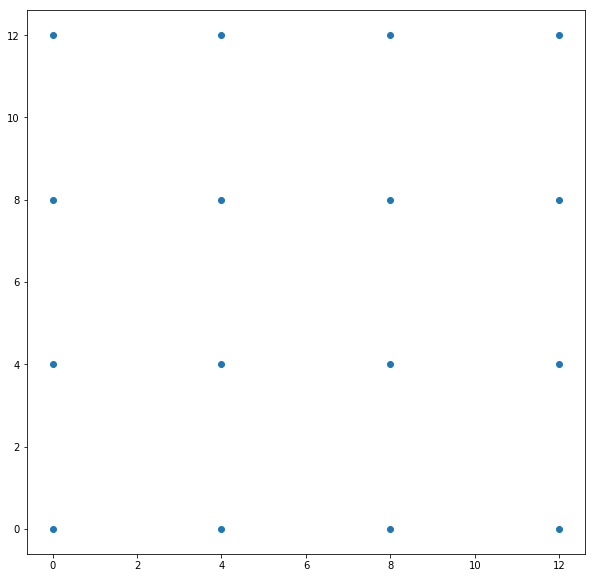

In [12]:
plt.figure(figsize=(10,10))
plt.scatter([x for x, y in nodes_coords], [y for x, y in nodes_coords])
plt.show()

In [13]:
def get_clases(clases):
    return_clases = []
    clasess = []
    flag =-1
    for idx, clas in enumerate(clases):
        #print (idx, clas)
        if len(clas) == 0:
            continue
        for cl in clas:
            for i,vb in enumerate(return_clases):
                if cl in vb:
                    flag = i
        if flag != -1:
            if idx not in return_clases[flag]:
                return_clases[flag].append(idx)
            for cl in clas:
                if cl in return_clases[flag]:
                    continue
                return_clases[flag].append(cl)                        
                for c in clases[cl]:
                    if c in return_clases[flag]:
                        continue
                    return_clases[flag].append(c)
        else:
            clasess.append(idx)
            for cl in clas:
                clasess.append(cl)                        
                for c in clases[cl]:
                    clasess.append(c)
            return_clases.append(clasess.copy())
        clasess.clear()
        flag = -1
    return return_clases
            

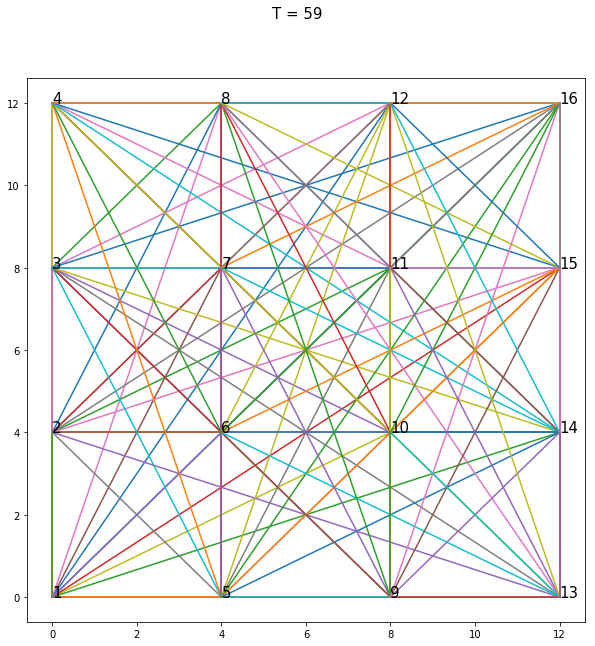

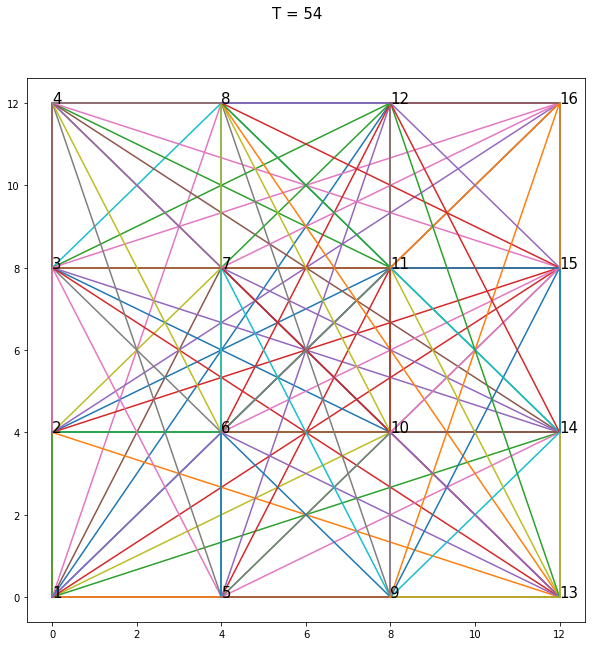

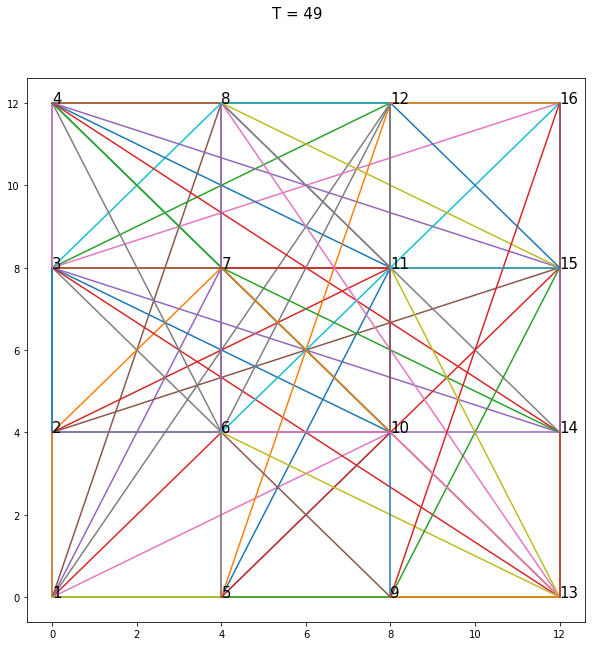

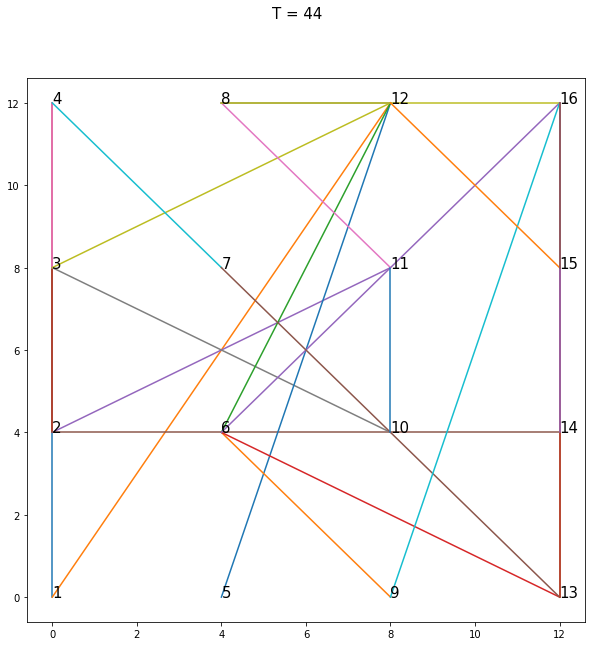

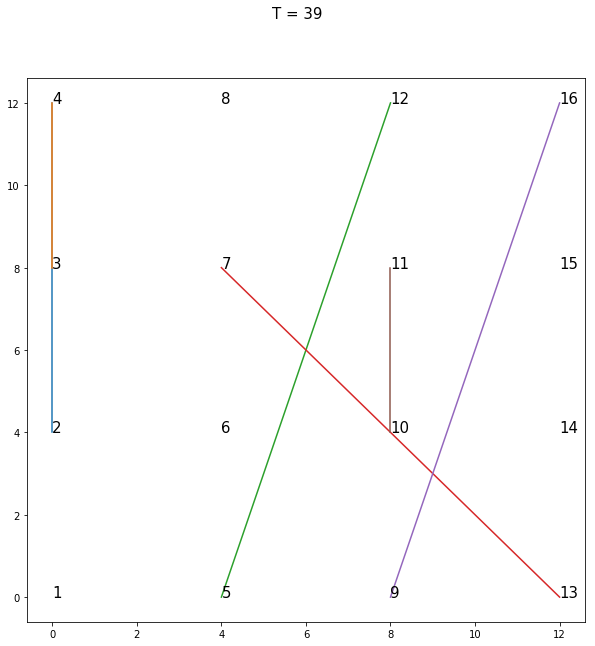

In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
clases_buf = {}
clases= []

cluster_class = []

for i, (t, matr) in enumerate(zip(T_arr, matr_arr)):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('T = %d' % t, fontsize=15)
    nodes_ax = fig.add_subplot(1, 1, 1)
    for i, (x, y) in enumerate(zip([x for x, y in nodes_coords], [y for x, y in nodes_coords])): 
        nodes_ax.annotate(i + 1, xy=(x, y), fontsize=15)
        clases_buf[x,y] = i+1
        clases.append([])
    clases.append([])
    for i in range(len(matr)):
        for j in range(i + 1, len(matr)):
            if matr[i][j]:
                ax = fig.add_subplot(1, 1, 1)
                s1, s2 = nodes_coords[i], nodes_coords[j]
                # print(clases_buf[s1[0],s1[1]],clases_buf[s2[0],s2[1]])
                clases[clases_buf[s1[0],s1[1]]].append(clases_buf[s2[0],s2[1]])
                ax.plot([s1[0], s2[0]], [s1[1], s2[1]])
    
    cluster_class = get_clases(clases)
    #print(cluster_class)
                
    clases.clear()
                
plt.show()

In [15]:
print(cluster_class)

[[2, 4, 3], [5, 12], [7, 13], [9, 16], [10, 11]]


In [16]:
def get_middle_mean(cluster_class_numb,friendliness):
    for_midel_mean = []
    for cl in cluster_class_numb:
        for_midel_mean.append(list(friendliness[cl-1]))
    middle_mean = middle_name(for_midel_mean)
    return middle_mean

In [17]:
middle_mean = get_middle_mean(cluster_class[0],friendliness)
middle_mean

{10: 17.666666666666668,
 4: 13.666666666666666,
 13: 9.666666666666666,
 6: 17.0,
 19: 8.666666666666666,
 3: 16.333333333333332,
 23: 16.333333333333332,
 9: 16.0,
 8: 12.666666666666666,
 14: 13.0,
 24: 13.666666666666666,
 18: 15.0,
 11: 16.0,
 5: 12.666666666666666,
 1: 18.333333333333332,
 16: 5.666666666666667,
 21: 11.0,
 15: 9.666666666666666,
 22: 5.666666666666667,
 2: 3.6666666666666665,
 12: 14.0,
 20: 11.333333333333334,
 7: 12.0,
 17: 10.333333333333334}

In [18]:
get_dic_from_list(friendliness[0])

{23: 24,
 19: 23,
 22: 22,
 17: 21,
 8: 20,
 6: 19,
 13: 18,
 1: 17,
 16: 16,
 9: 15,
 12: 14,
 3: 13,
 2: 12,
 20: 11,
 5: 10,
 21: 9,
 7: 8,
 24: 7,
 15: 6,
 4: 5,
 11: 4,
 18: 3,
 10: 2,
 14: 1}

In [19]:
def rast_vector(exp1,middle_mean):
    s = 0
    for key,value in exp1.items():
        s += np.sqrt((value - middle_mean[key])**2)
    return s

In [20]:
for group in cluster_class:
    t = []
    for i in group:
        t.append(friendliness[i-1])
    print(group, concordance_k(t))

[2, 4, 3] 0.008079710144927537
[5, 12] 0.0035699728260869565
[7, 13] 0.0033186141304347824
[9, 16] 0.003155570652173913
[10, 11] 0.0043716032608695655


In [21]:
exp1 = get_dic_from_list(friendliness[0])
rast_vector(exp1,middle_mean)

170.66666666666666

In [22]:
exp1 = get_dic_from_list(friendliness[5])
rast_vector(exp1,middle_mean)

164.66666666666666

In [23]:
middle_mean = get_middle_mean(cluster_class[2],friendliness)
exp1 = get_dic_from_list(friendliness[15])
rast_vector(exp1,middle_mean)

193.0

In [24]:
cl_cl = []
for i in range(16):
    cl_cl.append(i)
middle_mean = get_middle_mean(cl_cl,friendliness)
exp1 = get_dic_from_list(friendliness[11])
rast_vector(exp1,middle_mean)

149.625

In [25]:
cl_cl = []
for i in range(16):
    cl_cl.append(i)
middle_mean = get_middle_mean(cl_cl,friendliness)
exp1 = get_dic_from_list(friendliness[1])
rast_vector(exp1,middle_mean)

140.0

In [26]:
sum = 0
experts ={}
for clus in cluster_class:
    middle_mean = get_middle_mean(clus,friendliness)
    for exp_i in clus:
        exp = get_dic_from_list(friendliness[exp_i-1])
        rv= rast_vector(exp,middle_mean)
        sum += rv
        experts[exp_i] = rv 
    print('sum', sum)
    for key,value in experts.items():
        print(key,value/sum)
    sum=0
    experts.clear()
    

sum 344.00000000000006
2 0.3449612403100774
4 0.38953488372093026
3 0.2655038759689923
sum 184.0
5 0.5
12 0.5
sum 166.0
7 0.5
13 0.5
sum 164.0
9 0.5
16 0.5
sum 192.0
10 0.5
11 0.5


In [27]:
from random import shuffle
friendliness_new = []
authority = []
for _ in range(1):
    l = list(range(1, 25))
    shuffle(l)
    friendliness_new.append(l)
    l = list(range(1, 25))
    shuffle(l)
    authority.append(l)
print(friendliness_new)
exp_new = get_dic_from_list(friendliness_new[0])


[[19, 13, 12, 21, 22, 4, 20, 5, 3, 14, 7, 18, 10, 8, 16, 6, 17, 2, 11, 9, 24, 23, 1, 15]]


In [28]:
sum = 0
experts ={}
for clus in cluster_class:
    middle_mean = get_middle_mean(clus,friendliness)
    rv_new= rast_vector(exp_new,middle_mean)
    print(rv_new)
#     for exp_i in clus:
#         exp = get_dic_from_list(friendliness[exp_i-1])
#         rv= rast_vector(exp,middle_mean)
#         sum += rv
#         experts[exp_i] = rv 
#     print('sum', sum)
#     rv_new= rast_vector(exp_new,middle_mean)
#     print(rv_new/sum)
#     sum=0


178.0
162.0
131.0
167.0
152.0


In [29]:
matr = matr_arr[-1]
matr
# classes = []
# def group_exp(matr:np.array, number):
#     buf = []
#     for i in range(len(matr)):
#         if matr[number-1][i]:
#             buf.append(i+1)
#     return buf
# for i in range(len(matr)):
    

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 38.80721582,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 32.64965543,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 38.80721582, 32.64965543,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0